In [12]:
from ray.rllib.models import ModelCatalog

from agi.nl_holdem_env import NlHoldemEnvWithOpponent
from agi.nl_holdem_net import NlHoldemNet
ModelCatalog.register_custom_model('NlHoldemNet', NlHoldemNet)
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
conf = eval(open("confs/nl_holdem.py").read().strip())

In [3]:
env = NlHoldemEnvWithOpponent(
        conf,opponent="nn"
)

In [104]:
rewards = []
for i in tqdm(range(10)):
    obs = env.reset()
    agid = env.our_pid
    #rint("begin with",agid)
    d = False
    while not d:
        legal_moves = obs["legal_moves"]
        action_ind = np.random.choice(np.where(legal_moves)[0])
        #print("now",env.my_agent())
        assert(agid == env.my_agent())
        obs,r,d,i = env.step(action_ind)
    rewards.append(r)

100%|██████████| 10/10 [00:00<00:00, 641.90it/s]


In [105]:
np.average(rewards)

9.1

In [106]:
def plot_observation(obs):
    card_info = obs["card_info"]
    plt.figure(figsize=(10,2.5))
    for i in range(6):
        plt.subplot(2,3,i + 1)
        plt.imshow(card_info[:,:,i],vmin=0, vmax=1)
        
    action_info = obs["action_info"]
    plt.figure(figsize=(10,7))
    for i in range(25):
        plt.subplot(5,6,i + 1)
        plt.imshow(action_info[:,:,i],vmin=0, vmax=1)

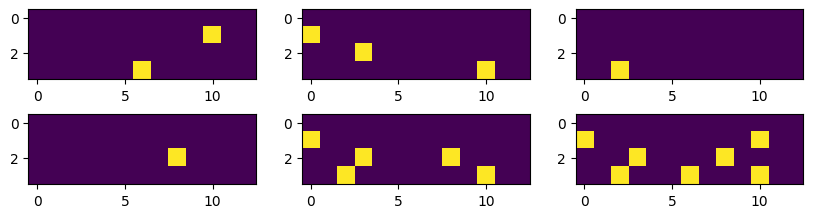

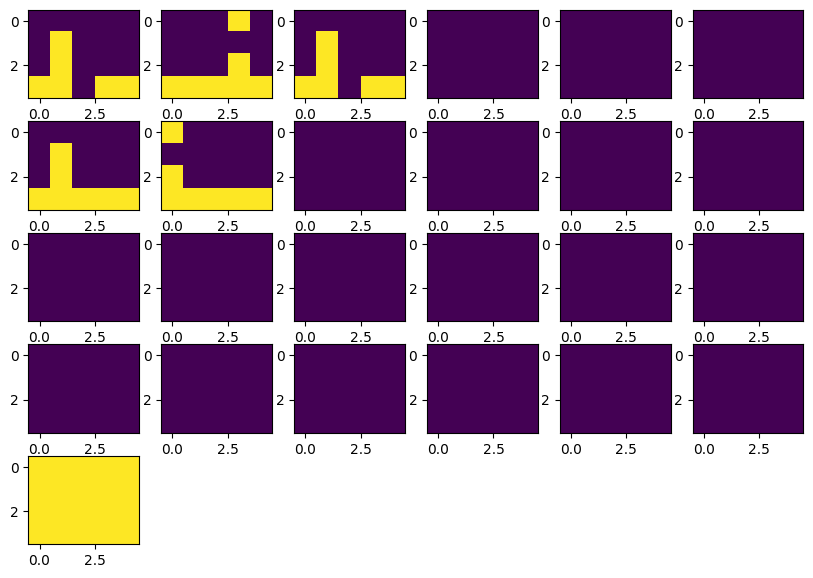

In [107]:
plot_observation(obs)

## see how the env works

In [152]:
obs = env.reset()

In [178]:
obs,r,d,i = env.step(1)

In [179]:
d

True

In [180]:
env.our_pid

1

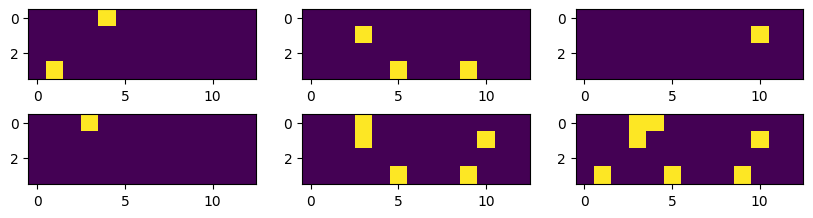

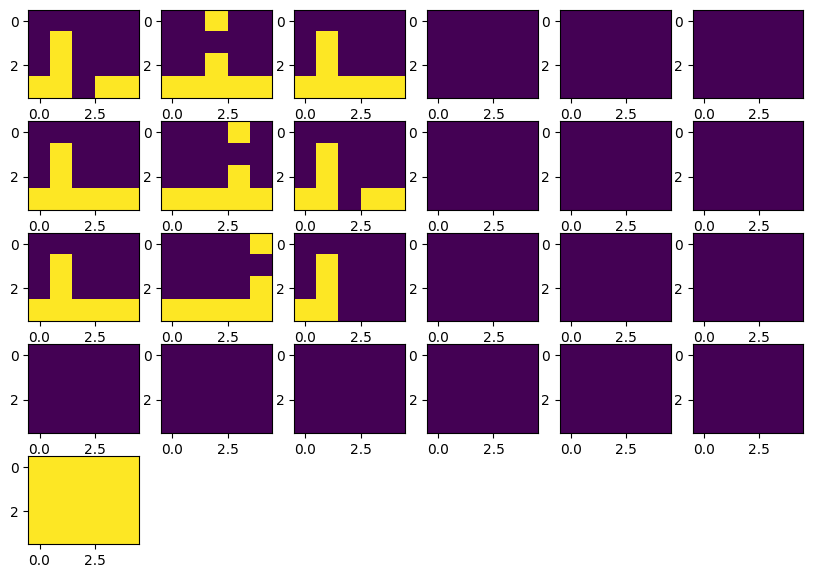

In [181]:
plot_observation(obs)